In [ ]:
# Compare OI (Gregory et al, 2021) and simple binning (Tsamados)

In [1]:
%matplotlib inline
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as io
import numpy as np
import glob
#from read_cryosat_day import get_cryosat_thickness
#from read_cryosat_day import get_cryosat_freeboard
#from read_cryosat_day import get_cryosat_elevation
#from read_cryosat_day import get_cryosat_sla
from scipy import stats
import datetime
from matplotlib.patches import Polygon
import time
import pickle
from datetime import date, timedelta
from netCDF4 import Dataset 

from scipy.interpolate import griddata





In [2]:
! pwd

/Users/micheltsamados/Documents/Coding/Binning


In [4]:
! ls /Volumes/EASE

freeboard_daily_interpolated freeboard_daily_processed


In [46]:
! ls Data_all_3days/

FB


In [5]:
from datetime import date, timedelta

def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)



In [17]:
# ! ls ~/Documents/Data/OI/freeboard_daily_interpolated/CS2_S3_GPOD/CS2
! ls /Volumes/EASE/freeboard_daily_interpolated/25km/

AK_CPOM    CS2S3_CPOM CS2S3_LARM CS2_CPOM   CS2_LARM   IS2        NETCDFs


# Load all OI data 




In [50]:
! ls /Volumes/EASE/freeboard_daily_interpolated/25km/

AK_CPOM    CS2S3_CPOM CS2S3_LARM CS2_CPOM   CS2_LARM   IS2        NETCDFs


In [169]:
#Initialize
fb_OI={}
year1=2019
year2=2020    
year1str  ='%02d' %(year1)
year2str  ='%02d' %(year2)

#load
datapath_OI='/Volumes/EASE/freeboard_daily_interpolated/25km/'
path_names=['AK_CPOM','CS2S3_CPOM','CS2S3_LARM','CS2_CPOM','CS2_LARM','IS2']
start_date = date(year1, 10, 5)
end_date = date(year2, 4, 23)
for n in path_names:
    print(n)
    fb_OI_list=[]
    for single_date in daterange(start_date, end_date):
        yearstr0  ='%02d' %(single_date.year)
        monthstr0 ='%02d' %(single_date.month)
        daystr0 ='%02d' %(single_date.day)
        print(single_date.strftime("%Y-%m-%d"),single_date.year,single_date.month,single_date.day)
        try: 
            fb_OI_list.append(np.load(datapath_OI+n+'/FB_interp_'+year1str+'-'+year2str+'_25km_'+yearstr0+monthstr0+daystr0+'.npy'))
        except:
            print('no data',single_date)
            fb_OI_list.append(np.full((360, 360), np.nan))

    fb_OI[n]=np.asarray(fb_OI_list)




In [164]:
year1str+'/'+year2str

'2019/2020'

# Plot data 


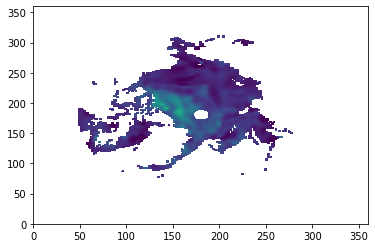

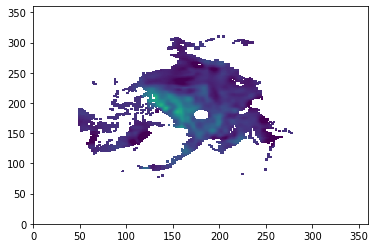

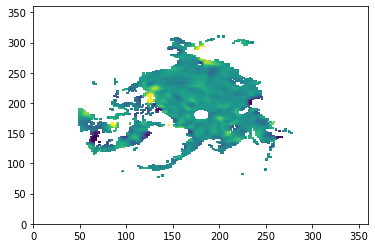

In [165]:
plt.pcolor(fb_OI['CS2_CPOM'][100],vmin=0,vmax=0.5)
plt.show()
plt.pcolor(fb_OI['CS2S3_CPOM'][100],vmin=0,vmax=0.5)
plt.show()
plt.pcolor(fb_OI['CS2S3_CPOM'][100]-fb_OI['CS2_CPOM'][100],vmin=-0.1,vmax=0.1)

# Load all binned data

In [78]:
! ls /Volumes/EASE/freeboard_daily_processed/CS2_CPOM/

dailyFB_25km_2010-2011_season.pkl dailyFB_50km_2010-2011_season.pkl
dailyFB_25km_2011-2012_season.pkl dailyFB_50km_2011-2012_season.pkl
dailyFB_25km_2012-2013_season.pkl dailyFB_50km_2012-2013_season.pkl
dailyFB_25km_2013-2014_season.pkl dailyFB_50km_2013-2014_season.pkl
dailyFB_25km_2014-2015_season.pkl dailyFB_50km_2014-2015_season.pkl
dailyFB_25km_2015-2016_season.pkl dailyFB_50km_2015-2016_season.pkl
dailyFB_25km_2016-2017_season.pkl dailyFB_50km_2016-2017_season.pkl
dailyFB_25km_2017-2018_season.pkl dailyFB_50km_2017-2018_season.pkl
dailyFB_25km_2018-2019_season.pkl dailyFB_50km_2018-2019_season.pkl
dailyFB_25km_2019-2020_season.pkl dailyFB_50km_2019-2020_season.pkl
dailyFB_25km_2020-2021_season.pkl dailyFB_50km_2020-2021_season.pkl


In [73]:
! ls /Volumes/EASE/freeboard_daily_processed/CS2S3_CPOM/

CS2_SARIN_dailyFB_25km_2018-2019_season.pkl
CS2_SARIN_dailyFB_25km_2019-2020_season.pkl
CS2_SARIN_dailyFB_50km_2018-2019_season.pkl
CS2_SARIN_dailyFB_50km_2019-2020_season.pkl
CS2_SAR_dailyFB_25km_2018-2019_season.pkl
CS2_SAR_dailyFB_25km_2019-2020_season.pkl
CS2_SAR_dailyFB_50km_2018-2019_season.pkl
CS2_SAR_dailyFB_50km_2019-2020_season.pkl
S3A_dailyFB_25km_2018-2019_season.pkl
S3A_dailyFB_25km_2019-2020_season.pkl
S3A_dailyFB_50km_2018-2019_season.pkl
S3A_dailyFB_50km_2019-2020_season.pkl
S3B_dailyFB_25km_2018-2019_season.pkl
S3B_dailyFB_25km_2019-2020_season.pkl
S3B_dailyFB_50km_2018-2019_season.pkl
S3B_dailyFB_50km_2019-2020_season.pkl


In [67]:
! ls /Volumes/EASE/freeboard_daily_processed/AK_CPOM

dailyFB_25km_2013-2014_season.pkl dailyFB_50km_2013-2014_season.pkl
dailyFB_25km_2014-2015_season.pkl dailyFB_50km_2014-2015_season.pkl
dailyFB_25km_2015-2016_season.pkl dailyFB_50km_2015-2016_season.pkl
dailyFB_25km_2016-2017_season.pkl dailyFB_50km_2016-2017_season.pkl
dailyFB_25km_2017-2018_season.pkl dailyFB_50km_2017-2018_season.pkl
dailyFB_25km_2018-2019_season.pkl dailyFB_50km_2018-2019_season.pkl
dailyFB_25km_2019-2020_season.pkl dailyFB_50km_2019-2020_season.pkl
dailyFB_25km_2020-2021_season.pkl dailyFB_50km_2020-2021_season.pkl


In [55]:
datapath='/Volumes/EASE/freeboard_daily_processed/CS2S3_CPOM/'

In [58]:
import pickle
f = open(datapath+'S3A_dailyFB_25km_2018-2019_season.pkl','rb')
test = pickle.load(f)

In [84]:
test[yearstr0+'03'+'01'].shape

(360, 360)

In [170]:
test.keys()

In [81]:
single_date.strftime("%Y-%m-%d")

'2019-04-22'

In [82]:
yearstr0+monthstr0+daystr0

'20190422'

In [171]:
#Initialize
fb_BIN={}
year1=2019
year2=2020    
year1str  ='%02d' %(year1)
year2str  ='%02d' %(year2)

#load
datapath='/Volumes/EASE/freeboard_daily_processed/'
path_names=['CS2_CPOM','CS2_LARM','IS2','AK_CPOM']
start_date = date(year1, 10, 5)
end_date = date(year2, 4, 23)
for n in path_names:
    print(n)
    fb_BIN_list=[]
    f = open(datapath+n+'/dailyFB_25km_'+year1str+'-'+year2str+'_season.pkl','rb')    
    temp=pickle.load(f)
    for single_date in daterange(start_date, end_date):
        yearstr0  ='%02d' %(single_date.year)
        monthstr0 ='%02d' %(single_date.month)
        daystr0 ='%02d' %(single_date.day)
        print(single_date.strftime("%Y-%m-%d"),single_date.year,single_date.month,single_date.day)
        try: 
            print(yearstr0+monthstr0+daystr0)
            fb_BIN_list.append(temp[yearstr0+monthstr0+daystr0])
        except:
            print('no data',single_date)
            fb_BIN_list.append(np.full((360, 360), np.nan))

    fb_BIN[n]=np.asarray(fb_BIN_list)




In [173]:
fb_BIN['CS2S3_CPOM']={}

path_names=['CS2_SARIN','CS2_SAR','S3A','S3B']
start_date = date(year1, 10, 5)
end_date = date(year2, 4, 23)
for n in path_names:
    f = open(datapath+'CS2S3_CPOM/'+n+'_dailyFB_25km_'+year1str+'-'+year2str+'_season.pkl','rb')
    temp=pickle.load(f)
    print(n)
    fb_BIN_list=[]
    for single_date in daterange(start_date, end_date):
        yearstr0  ='%02d' %(single_date.year)
        monthstr0 ='%02d' %(single_date.month)
        daystr0 ='%02d' %(single_date.day)
        print(single_date.strftime("%Y-%m-%d"),single_date.year,single_date.month,single_date.day)
        try: 
            fb_BIN_list.append(temp[yearstr0+monthstr0+daystr0])
        except:
            print('no data',single_date)
            fb_BIN_list.append(np.full((360, 360), np.nan))

    fb_BIN['CS2S3_CPOM'][n]=np.asarray(fb_BIN_list)
    
fb_BIN['CS2S3_LARM']={}    
path_names=['CS2','S3']
start_date = date(year1, 10, 5)
end_date = date(year2, 4, 23)
for n in path_names:
    f = open(datapath+'CS2S3_LARM/'+n+'_dailyFB_25km_'+year1str+'-'+year2str+'_season.pkl','rb')
    temp=pickle.load(f)
    print(n)
    fb_BIN_list=[]
    for single_date in daterange(start_date, end_date):
        yearstr0  ='%02d' %(single_date.year)
        monthstr0 ='%02d' %(single_date.month)
        daystr0 ='%02d' %(single_date.day)
        print(single_date.strftime("%Y-%m-%d"),single_date.year,single_date.month,single_date.day)
        try: 
            fb_BIN_list.append(temp[yearstr0+monthstr0+daystr0])
        except:
            print('no data',single_date)
            fb_BIN_list.append(np.full((360, 360), np.nan))

    fb_BIN['CS2S3_LARM'][n]=np.asarray(fb_BIN_list)    



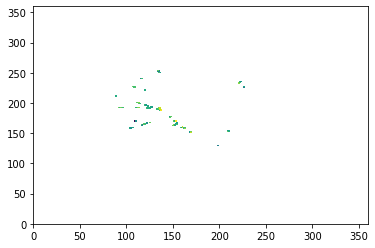

In [174]:
plt.pcolor(fb_BIN['CS2S3_CPOM']['CS2_SARIN'][50])

In [131]:
fb_BIN['CS2S3_CPOM']['CS2_SARIN'].shape

(200, 360, 360)

In [132]:
fb_BIN.keys()

dict_keys(['CS2_CPOM', 'CS2_LARM', 'IS2', 'AK_CPOM', 'CS2S3_CPOM', 'CS2S3_LARM'])

In [133]:
fb_OI.keys()

dict_keys(['CS2_CPOM', 'CS2S3_CPOM', 'CS2_LARM', 'AK_CPOM', 'CS2S3_LARM', 'IS2'])

In [146]:
for i in fb_OI.keys():
    print(i)

CS2_CPOM
CS2S3_CPOM
CS2_LARM
AK_CPOM
CS2S3_LARM
IS2


In [138]:
fb_OI['CS2S3_CPOM'].shape

(200, 360, 360)

# Plot time series masked 

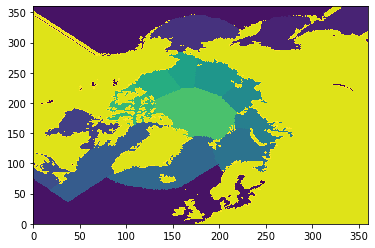

In [130]:
#load mask
mask_EASE2=np.load('NSIDC_Regions_Mask.npy')
plt.pcolor(mask_EASE2)

In [135]:
mask_EASE2.shape

(360, 360)

In [162]:
fb_OI['CS2S3_LARM'].shape

(200, 360, 360)

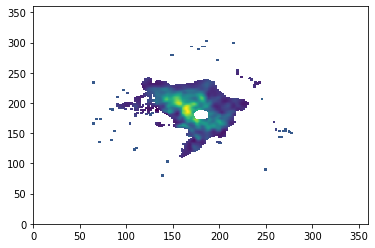

In [167]:
plt.pcolor(fb_OI['CS2_LARM'][10])

199
200
200
200
200
200


/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice
  app.launch_new_instance()


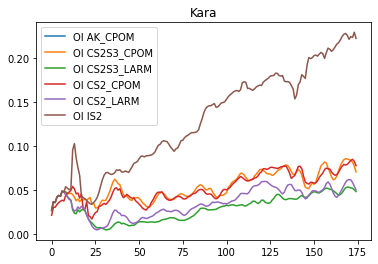

200
200
200
200
200
200


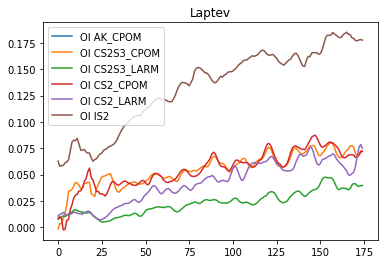

200
200
200
200
200
200


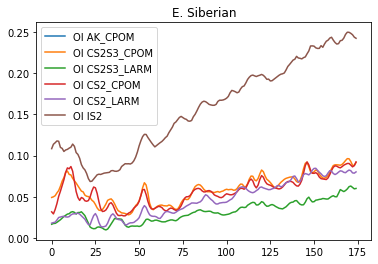

200
200
200
200
200
200


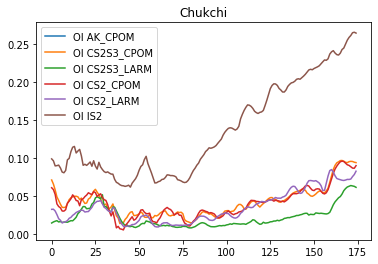

200
200
200
200
200
200


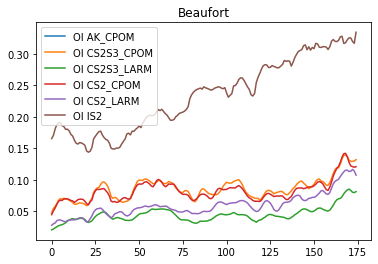

200
200
200
200
200
200


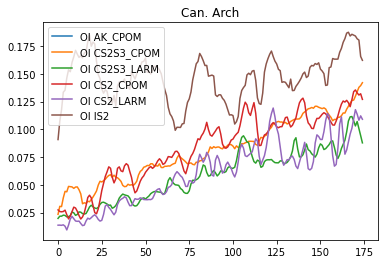

200
200
200
200
200
200


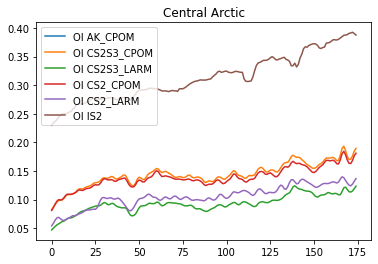

200
200
200
200
200
200


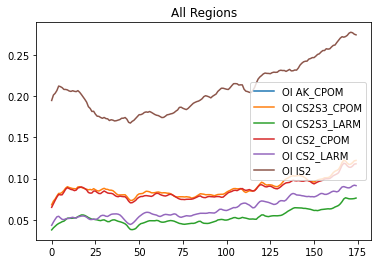

In [168]:
regions = [[9], [10], [11], [12], [13], [14], [15], [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,21]]
reg_name = ['Kara', 'Laptev', 'E. Siberian', 'Chukchi','Beaufort', 'Can. Arch', 'Central Arctic', 'All Regions']


for nr in range(8):

    fb_OI_regions = {}
    for n in fb_OI.keys():
        print(i)   
        fb_OI_regions[n]={}
        fb_OI_regions[n][reg_name[nr]]=[]


        for i in range(fb_OI[n].shape[0]):
            reg = np.isin(mask_EASE2,regions[nr])
            interp_mean = np.nanmean(fb_OI[n][i][reg])
            fb_OI_regions[n][reg_name[nr]].append(interp_mean)        
    
    for n in fb_OI.keys():
        plt.plot(fb_OI_regions[n][reg_name[nr]],label='OI '+n)
    plt.title(reg_name[nr])
    plt.legend()
#     plt.savefig('OI_vs_BIN_'+reg_name[nr]+'.png')
    plt.show()


#     fb_regions = []
#     fb_regions_3d = []    
#     fb_Bristol_regions = []
#     fb_OI_CS2S3_regions = []
#     fb_OI_Bristol_LARM_regions = []
# dict_keys(['CS2_CPOM', 'CS2S3_CPOM', 'CS2_LARM', 'AK_CPOM', 'CS2S3_LARM', 'IS2'])




199
199
199
199
199
199


/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice
  app.launch_new_instance()


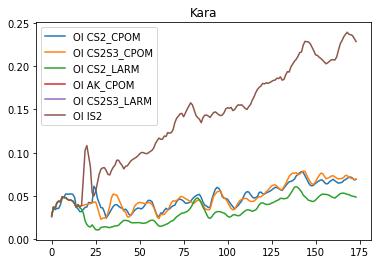

199
199
199
199
199
199


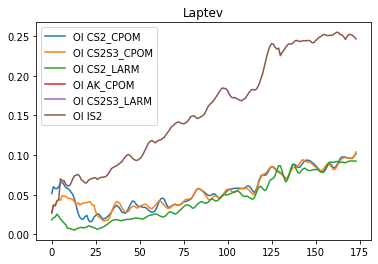

199
199
199
199
199
199


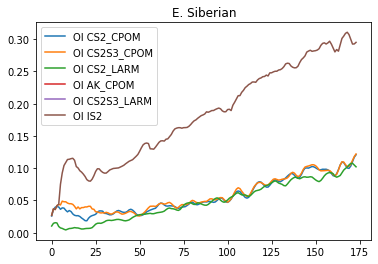

199
199
199
199
199
199


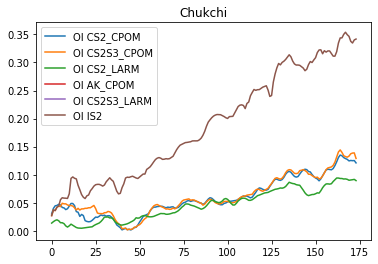

199
199
199
199
199
199


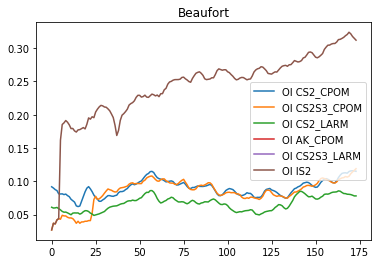

199
199
199
199
199
199


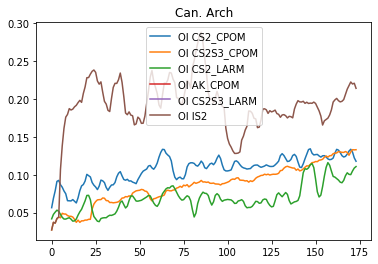

199
199
199
199
199
199


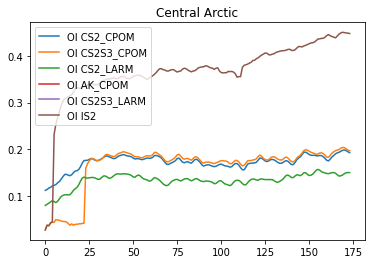

199
199
199
199
199
199


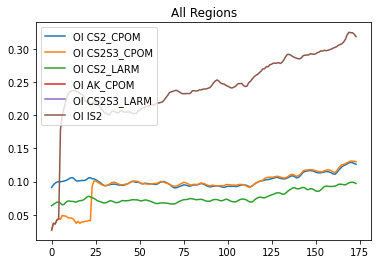

In [156]:
regions = [[9], [10], [11], [12], [13], [14], [15], [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,21]]
reg_name = ['Kara', 'Laptev', 'E. Siberian', 'Chukchi','Beaufort', 'Can. Arch', 'Central Arctic', 'All Regions']


for nr in range(8):

    fb_OI_regions = {}
    for n in fb_OI.keys():
        print(i)   
        fb_OI_regions[n]={}
        fb_OI_regions[n][reg_name[nr]]=[]


        for i in range(fb_OI[n].shape[0]):
            reg = np.isin(mask_EASE2,regions[nr])
            interp_mean = np.nanmean(fb_OI[n][i][reg])
            fb_OI_regions[n][reg_name[nr]].append(interp_mean)        
    
    for n in fb_OI.keys():
        plt.plot(fb_OI_regions[n][reg_name[nr]],label='OI '+n)
    plt.title(reg_name[nr])
    plt.legend()
#     plt.savefig('OI_vs_BIN_'+reg_name[nr]+'.png')
    plt.show()


#     fb_regions = []
#     fb_regions_3d = []    
#     fb_Bristol_regions = []
#     fb_OI_CS2S3_regions = []
#     fb_OI_Bristol_LARM_regions = []
# dict_keys(['CS2_CPOM', 'CS2S3_CPOM', 'CS2_LARM', 'AK_CPOM', 'CS2S3_LARM', 'IS2'])



In [153]:
for n in fb_OI.keys():
    print(n)
    print(reg_name[nr])

CS2_CPOM
Kara
CS2S3_CPOM
Kara
CS2_LARM
Kara
AK_CPOM
Kara
CS2S3_LARM
Kara
IS2
Kara


In [ ]:
regions = [[9], [10], [11], [12], [13], [14], [15], [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,21]]
reg_name = ['Kara', 'Laptev', 'E. Siberian', 'Chukchi','Beaufort', 'Can. Arch', 'Central Arctic', 'All Regions']


for nr in range(8):

    fb_OI_regions = []
    fb_regions = []
    fb_regions_3d = []    
    fb_Bristol_regions = []
    fb_OI_CS2S3_regions = []
    fb_OI_Bristol_LARM_regions = []


    for i in range(len(fb_OI_list)-1):
        reg = np.isin(mask_values,regions[nr])
        interp_mean = np.nanmean(fb_OI_array[i][reg])
        fb_OI_regions.append(interp_mean)

        reg = np.isin(mask_values,regions[nr])
        interp_mean = np.nanmean(fb_OI_CS2S3_array[i][reg])
        fb_OI_CS2S3_regions.append(interp_mean)

        reg = np.isin(mask_values,regions[nr])
        interp_mean = np.nanmean(fb_OI_Bristol_LARM_array[i][reg])
        fb_OI_Bristol_LARM_regions.append(interp_mean)
        
        reg = np.isin(mask_values,regions[nr])
        interp_mean = np.nanmean(fb_array[i].T[reg])
        fb_regions.append(interp_mean)

        reg = np.isin(mask_values,regions[nr])
        interp_mean = np.nanmean(fb_array_3d[i].T[reg])
        fb_regions_3d.append(interp_mean)        
        
        reg = np.isin(mask_values,regions[nr])
        interp_mean = np.nanmean(fb_Bristol_array[i].T[reg])
        fb_Bristol_regions.append(interp_mean)        
        

    plt.plot(fb_OI_regions,label='OI')
# #     plt.plot(fb_OI_CS2S3_regions,label='OI CS2S3')
#     plt.plot(fb_OI_Bristol_LARM_regions,label='OI CS2 LARM')

    plt.plot(fb_regions,label='BIN')
    plt.plot(fb_regions_3d,label='BIN 3d')
#     plt.plot(fb_Bristol_regions,label='BIN LARM')

    plt.title(reg_name[nr])
    plt.legend()
    plt.savefig('OI_vs_BIN_'+reg_name[nr]+'.png')
    plt.show()

In [27]:
! ls /Volumes/EASE/freeboard_daily_interpolated/25km/

AK_CPOM    CS2S3_CPOM CS2S3_LARM CS2_CPOM   CS2_LARM   IS2        NETCDFs


In [279]:
! ls /Users/micheltsamados/Documents/Data/OI/freeboard_daily_interpolated/Bristol_LARM/CS2/freeboard/

FB_interp_2010-2011_50km_20101005.npy
FB_interp_2010-2011_50km_20101006.npy
FB_interp_2010-2011_50km_20101007.npy
FB_interp_2010-2011_50km_20101008.npy
FB_interp_2010-2011_50km_20101009.npy
FB_interp_2010-2011_50km_20101010.npy
FB_interp_2010-2011_50km_20101011.npy
FB_interp_2010-2011_50km_20101012.npy
FB_interp_2010-2011_50km_20101013.npy
FB_interp_2010-2011_50km_20101014.npy
FB_interp_2010-2011_50km_20101015.npy
FB_interp_2010-2011_50km_20101016.npy
FB_interp_2010-2011_50km_20101017.npy
FB_interp_2010-2011_50km_20101018.npy
FB_interp_2010-2011_50km_20101019.npy
FB_interp_2010-2011_50km_20101020.npy
FB_interp_2010-2011_50km_20101021.npy
FB_interp_2010-2011_50km_20101022.npy
FB_interp_2010-2011_50km_20101023.npy
FB_interp_2010-2011_50km_20101024.npy
FB_interp_2010-2011_50km_20101025.npy
FB_interp_2010-2011_50km_20101026.npy
FB_interp_2010-2011_50km_20101027.npy
FB_interp_2010-2011_50km_20101028.npy
FB_interp_2010-2011_50km_20101029.npy
FB_interp_2010-2011_50km_20101030.npy
FB_interp_20

In [ ]:

# def regions_WG(regs):

#     WG_mean = []
#     for i in range(len(dates)):
#         if SAT == 'CS2_CPOM':
#             WG = CS2_CPOM[i]
#         elif SAT == 'S3_GPOD_Bristol':
#             WG = S3_GPOD_Bristol[i]
#         elif SAT == 'SM':
#             WG = snow[i]
#         elif SAT == 'CS2_Bristol':
#             WG = CS2_Bristol[i]
#         elif SAT == 'CS2_S3_GPOD':
#             WG = CS2_S3_GPOD[i]
#         WG_c = WG.copy()
#         reg = np.isin(mask_values,regs)
#         interp_mean = np.nanmean(WG_c[reg])
#         WG_mean.append(interp_mean)

#     return(WG_mean) 


In [116]:
! ls /Users/micheltsamados/Documents/Data/OI/freeboard_daily_interpolated/CS2_S3_GPOD/CS2/FB_interp_2018-2019_50km_20190426.npy

/Users/micheltsamados/Documents/Data/OI/freeboard_daily_interpolated/CS2_S3_GPOD/CS2/FB_interp_2018-2019_50km_20190426.npy


In [66]:
! ls ~/Documents/Data/OI/freeboard_daily_interpolated/CS2_CPOM/FB_interp_2018-2019_50km_20181005.npy

/Users/micheltsamados/Documents/Data/OI/freeboard_daily_interpolated/CS2_CPOM/FB_interp_2018-2019_50km_20181005.npy


In [ ]:
FB_interp_2018-2019_50km_20181101.npy

In [306]:
np.full((160, 160), 3.)

array([[3., 3., 3., ..., 3., 3., 3.],
       [3., 3., 3., ..., 3., 3., 3.],
       [3., 3., 3., ..., 3., 3., 3.],
       ...,
       [3., 3., 3., ..., 3., 3., 3.],
       [3., 3., 3., ..., 3., 3., 3.],
       [3., 3., 3., ..., 3., 3., 3.]])

In [18]:
! ls Data_all_3days/Fb

hist2D_freeboard_map_calc_count_day_20170831.npy
hist2D_freeboard_map_calc_count_day_20170901.npy
hist2D_freeboard_map_calc_count_day_20170902.npy
hist2D_freeboard_map_calc_count_day_20170903.npy
hist2D_freeboard_map_calc_count_day_20170904.npy
hist2D_freeboard_map_calc_count_day_20170905.npy
hist2D_freeboard_map_calc_count_day_20170906.npy
hist2D_freeboard_map_calc_count_day_20170907.npy
hist2D_freeboard_map_calc_count_day_20170908.npy
hist2D_freeboard_map_calc_count_day_20170909.npy
hist2D_freeboard_map_calc_count_day_20170910.npy
hist2D_freeboard_map_calc_count_day_20170911.npy
hist2D_freeboard_map_calc_count_day_20170912.npy
hist2D_freeboard_map_calc_count_day_20170913.npy
hist2D_freeboard_map_calc_count_day_20170914.npy
hist2D_freeboard_map_calc_count_day_20170915.npy
hist2D_freeboard_map_calc_count_day_20170916.npy
hist2D_freeboard_map_calc_count_day_20170917.npy
hist2D_freeboard_map_calc_count_day_20170918.npy
hist2D_freeboard_map_calc_count_day_20170919.npy
hist2D_freeboard_map

In [19]:
#Load binned data 
period=3
periodtext ='%01d' %(period)
start_date = date(year1, 10, 5)
end_date = date(year2, 4, 23)
fb_list=[]
fb_count_list=[]

for single_date in daterange(start_date, end_date):
    yearstr0  ='%02d' %(single_date.year)
    monthstr0 ='%02d' %(single_date.month)
    daystr0 ='%02d' %(single_date.day)
    print(single_date.strftime("%Y-%m-%d"),single_date.year,single_date.month,single_date.day)
    try:
        fb_list.append(np.load('Data_all_'+periodtext+'days/FB/hist2D_freeboard_map_calc_day_'+yearstr0+monthstr0+daystr0+'.npy'))
        fb_count_list.append(np.load('Data_all_'+periodtext+'days/FB/hist2D_freeboard_map_calc_count_day_'+yearstr0+monthstr0+daystr0+'.npy'))
    except:
        print('no data',single_date)
        fb_list.append(np.full((160, 160), np.nan))
        fb_count_list.append(np.full((160, 160), np.nan))

        
fb_array_3d=np.asarray(fb_list)
fb_count_array_3d=np.asarray(fb_count_list)




2018-10-05 2018 10 5
2018-10-06 2018 10 6
2018-10-07 2018 10 7
2018-10-08 2018 10 8
2018-10-09 2018 10 9
2018-10-10 2018 10 10
2018-10-11 2018 10 11
2018-10-12 2018 10 12
2018-10-13 2018 10 13
2018-10-14 2018 10 14
2018-10-15 2018 10 15
2018-10-16 2018 10 16
2018-10-17 2018 10 17
2018-10-18 2018 10 18
2018-10-19 2018 10 19
2018-10-20 2018 10 20
2018-10-21 2018 10 21
2018-10-22 2018 10 22
2018-10-23 2018 10 23
2018-10-24 2018 10 24
2018-10-25 2018 10 25
2018-10-26 2018 10 26
2018-10-27 2018 10 27
2018-10-28 2018 10 28
2018-10-29 2018 10 29
2018-10-30 2018 10 30
2018-10-31 2018 10 31
2018-11-01 2018 11 1
2018-11-02 2018 11 2
2018-11-03 2018 11 3
2018-11-04 2018 11 4
2018-11-05 2018 11 5
2018-11-06 2018 11 6
2018-11-07 2018 11 7
2018-11-08 2018 11 8
2018-11-09 2018 11 9
2018-11-10 2018 11 10
2018-11-11 2018 11 11
2018-11-12 2018 11 12
2018-11-13 2018 11 13
2018-11-14 2018 11 14
2018-11-15 2018 11 15
2018-11-16 2018 11 16
2018-11-17 2018 11 17
2018-11-18 2018 11 18
2018-11-19 2018 11 19
20

In [21]:
# ! ls Data_all_3days/FB/

In [22]:
#Load binned data 
period=9
periodtext ='%01d' %(period)
start_date = date(year1, 10, 5)
end_date = date(year2, 4, 23)
fb_list=[]
fb_count_list=[]

for single_date in daterange(start_date, end_date):
    yearstr0  ='%02d' %(single_date.year)
    monthstr0 ='%02d' %(single_date.month)
    daystr0 ='%02d' %(single_date.day)
    print(single_date.strftime("%Y-%m-%d"),single_date.year,single_date.month,single_date.day)
    fb_list.append(np.load('Data_all_'+periodtext+'days/FB/hist2D_freeboard_map_calc_day_'+yearstr0+monthstr0+daystr0+'.npy'))
    fb_count_list.append(np.load('Data_all_'+periodtext+'days/FB/hist2D_freeboard_map_calc_count_day_'+yearstr0+monthstr0+daystr0+'.npy'))

fb_array=np.asarray(fb_list)
fb_count_array=np.asarray(fb_count_list)



2018-10-05 2018 10 5
2018-10-06 2018 10 6
2018-10-07 2018 10 7
2018-10-08 2018 10 8
2018-10-09 2018 10 9
2018-10-10 2018 10 10
2018-10-11 2018 10 11
2018-10-12 2018 10 12
2018-10-13 2018 10 13
2018-10-14 2018 10 14
2018-10-15 2018 10 15
2018-10-16 2018 10 16
2018-10-17 2018 10 17
2018-10-18 2018 10 18
2018-10-19 2018 10 19
2018-10-20 2018 10 20
2018-10-21 2018 10 21
2018-10-22 2018 10 22
2018-10-23 2018 10 23
2018-10-24 2018 10 24
2018-10-25 2018 10 25
2018-10-26 2018 10 26
2018-10-27 2018 10 27
2018-10-28 2018 10 28
2018-10-29 2018 10 29
2018-10-30 2018 10 30
2018-10-31 2018 10 31
2018-11-01 2018 11 1
2018-11-02 2018 11 2
2018-11-03 2018 11 3
2018-11-04 2018 11 4
2018-11-05 2018 11 5
2018-11-06 2018 11 6
2018-11-07 2018 11 7
2018-11-08 2018 11 8
2018-11-09 2018 11 9
2018-11-10 2018 11 10
2018-11-11 2018 11 11
2018-11-12 2018 11 12
2018-11-13 2018 11 13
2018-11-14 2018 11 14
2018-11-15 2018 11 15
2018-11-16 2018 11 16
2018-11-17 2018 11 17
2018-11-18 2018 11 18
2018-11-19 2018 11 19
20

In [23]:
fb_OI_array.shape

(201, 160, 160)

In [24]:
#Load LARM binned data 
period=9
periodtext ='%01d' %(period)
start_date = date(year1, 10, 5)
end_date = date(year2, 4, 23)
fb_Bristol_list=[]
fb_count_Bristol_list=[]

for single_date in daterange(start_date, end_date):
    yearstr0  ='%02d' %(single_date.year)
    monthstr0 ='%02d' %(single_date.month)
    daystr0 ='%02d' %(single_date.day)
    print(single_date.strftime("%Y-%m-%d"),single_date.year,single_date.month,single_date.day)
    fb_Bristol_list.append(np.load('Data_all_'+periodtext+'days/FB_Bristol/hist2D_freeboard_map_calc_day_'+yearstr0+monthstr0+daystr0+'.npy'))
    fb_count_Bristol_list.append(np.load('Data_all_'+periodtext+'days/FB_Bristol/hist2D_freeboard_map_calc_count_day_'+yearstr0+monthstr0+daystr0+'.npy'))

fb_Bristol_array=np.asarray(fb_Bristol_list)
fb_count_Bristol_array=np.asarray(fb_count_Bristol_list)




2018-10-05 2018 10 5
2018-10-06 2018 10 6
2018-10-07 2018 10 7
2018-10-08 2018 10 8
2018-10-09 2018 10 9
2018-10-10 2018 10 10
2018-10-11 2018 10 11
2018-10-12 2018 10 12
2018-10-13 2018 10 13
2018-10-14 2018 10 14
2018-10-15 2018 10 15
2018-10-16 2018 10 16
2018-10-17 2018 10 17
2018-10-18 2018 10 18
2018-10-19 2018 10 19
2018-10-20 2018 10 20
2018-10-21 2018 10 21
2018-10-22 2018 10 22
2018-10-23 2018 10 23
2018-10-24 2018 10 24
2018-10-25 2018 10 25
2018-10-26 2018 10 26
2018-10-27 2018 10 27
2018-10-28 2018 10 28
2018-10-29 2018 10 29
2018-10-30 2018 10 30
2018-10-31 2018 10 31
2018-11-01 2018 11 1
2018-11-02 2018 11 2
2018-11-03 2018 11 3
2018-11-04 2018 11 4
2018-11-05 2018 11 5
2018-11-06 2018 11 6
2018-11-07 2018 11 7
2018-11-08 2018 11 8
2018-11-09 2018 11 9
2018-11-10 2018 11 10
2018-11-11 2018 11 11
2018-11-12 2018 11 12
2018-11-13 2018 11 13
2018-11-14 2018 11 14
2018-11-15 2018 11 15
2018-11-16 2018 11 16
2018-11-17 2018 11 17
2018-11-18 2018 11 18
2018-11-19 2018 11 19
20

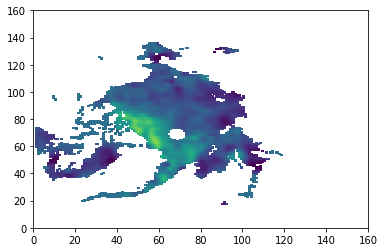

In [51]:
plt.pcolor(fb_OI_array[169],vmin=0,vmax=0.4)

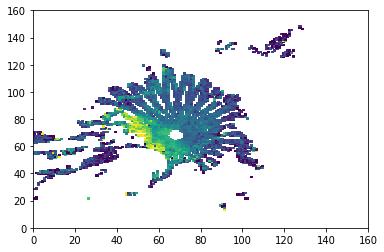

In [64]:
plt.pcolor(fb_array[169].T,vmin=0,vmax=0.4)

In [73]:
IDs

(array([ 13,  14,  15, ..., 146, 147, 148]),
 array([ 91,  91,  90, ..., 128, 127, 127]))

In [80]:
IDs = np.where(np.isnan(fb_array[169].T))

In [83]:
IDs = np.where(np.isnan(fb_array[169].T))
temp=fb_OI_array[169].copy()
temp[IDs]=np.nan

In [84]:
temp[IDs]=np.nan

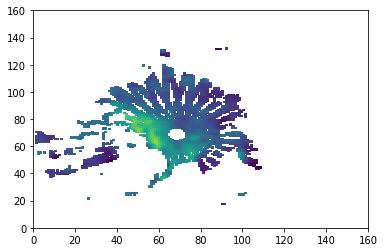

In [85]:
plt.pcolor(temp,vmin=0,vmax=0.4)

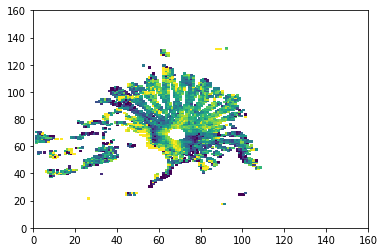

In [60]:
plt.pcolor(temp,vmin=-0.1,vmax=0.1)

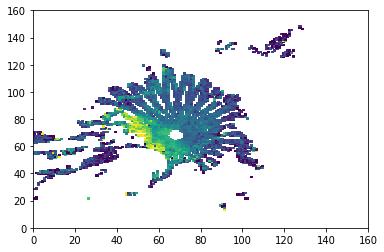

In [52]:
plt.pcolor(fb_array[169].T,vmin=0,vmax=0.4)

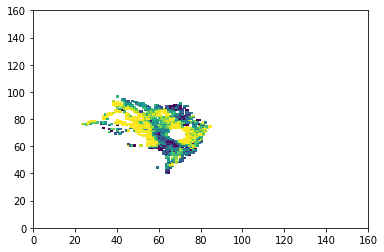

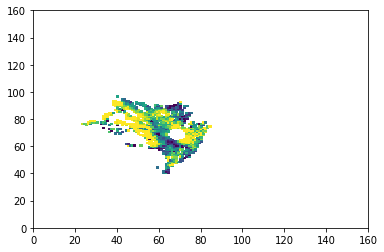

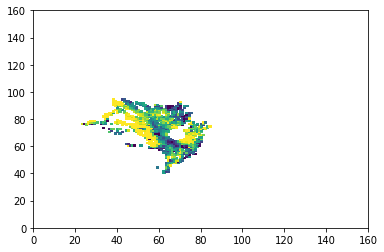

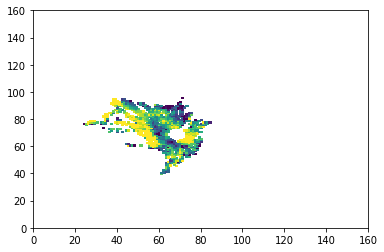

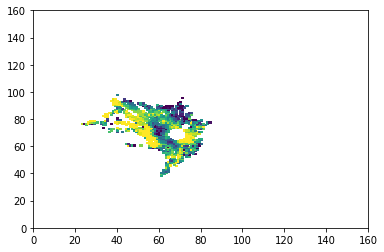

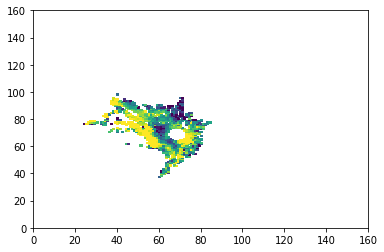

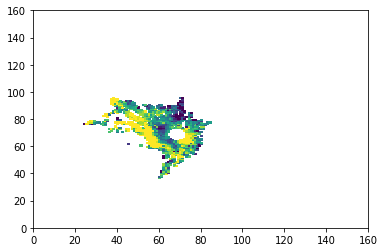

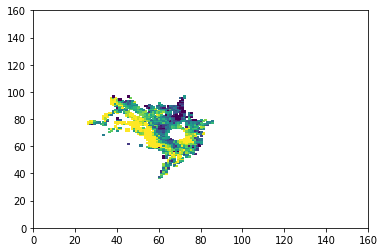

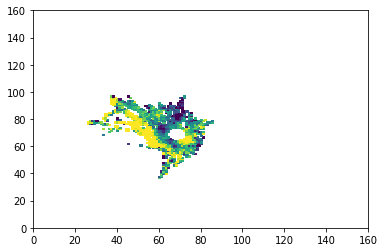

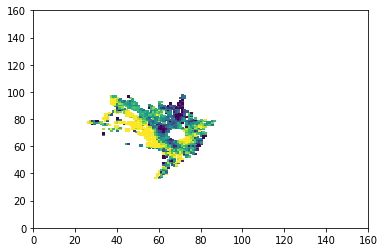

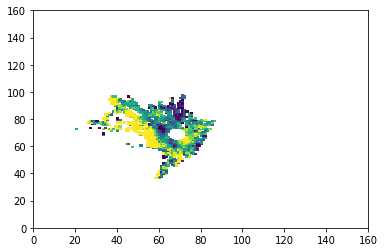

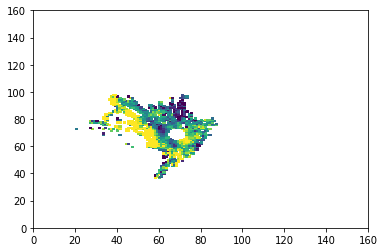

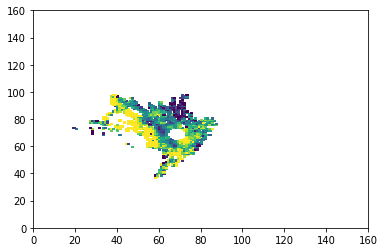

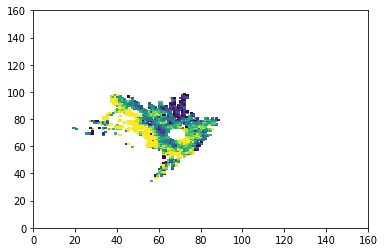

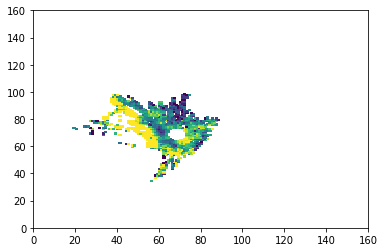

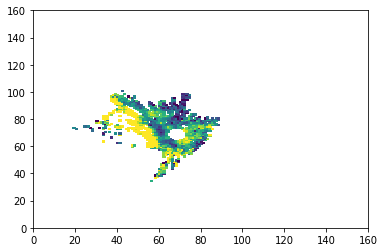

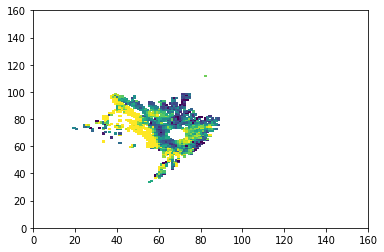

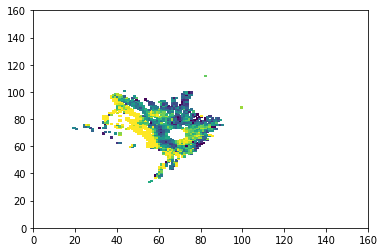

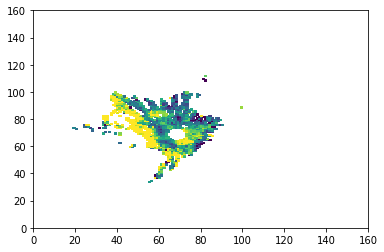

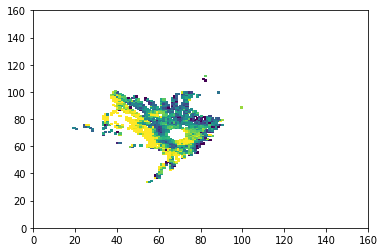

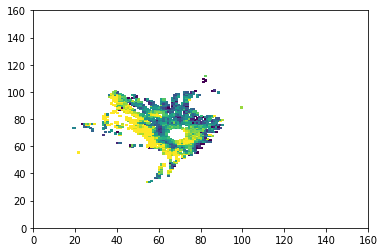

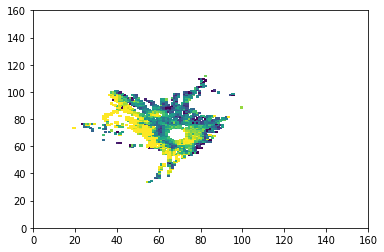

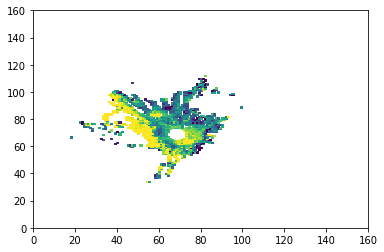

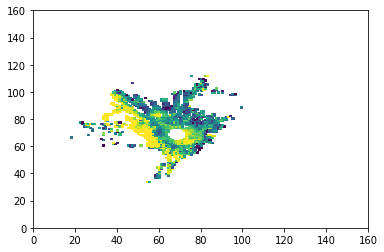

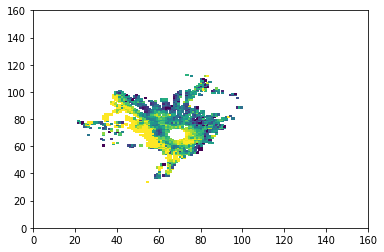

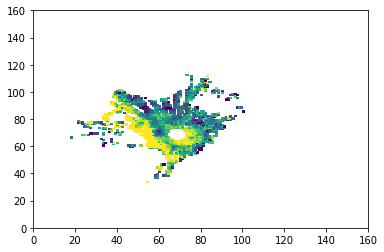

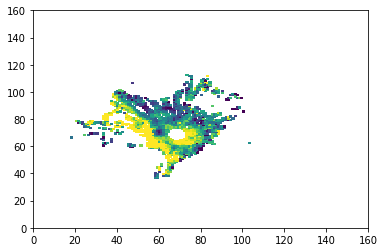

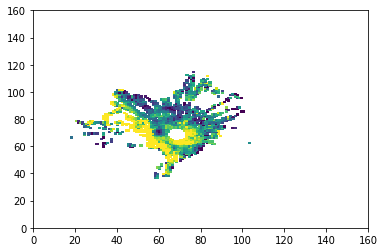

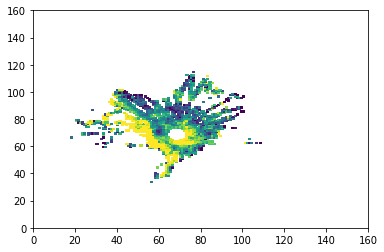

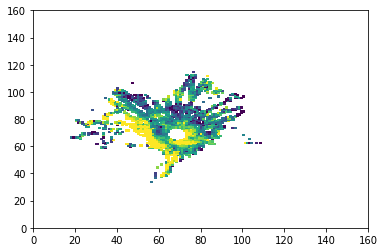

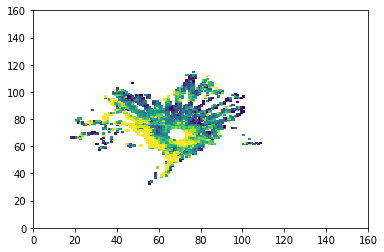

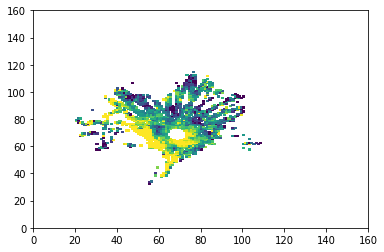

KeyboardInterrupt: 

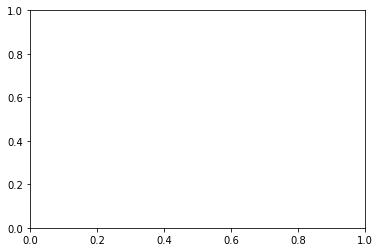

In [27]:
for n in range(200):
    plt.pcolor(fb_array[n].T-fb_OI_array[n],vmin=-0.1,vmax=0.1)
    plt.show()

In [28]:
mplot = Basemap(projection='npstere',boundinglat=60,lon_0=0, resolution='l',round=True)


# lons_grid2=np.load('/Users/micheltsamados/Documents/Data/OI/will_lons.npy')
# lats_grid2=np.load('/Users/micheltsamados/Documents/Data/OI/will_lats.npy')
                   
# x_WG,y_WG = mplot(lons_grid2,lats_grid2) 


# x_WG=np.load('./x_50km.npy')
# y_WG=np.load('./y_50km.npy')

x_WG=np.load('x2D.npy')
y_WG=np.load('y2D.npy')



nsidc_lat = np.fromfile('./psn25lats_v3.dat',dtype='<i4').reshape(448,304)/100000
nsidc_lon = np.fromfile('./psn25lons_v3.dat',dtype='<i4').reshape(448,304)/100000
                   
                
nsidc_x,nsidc_y = mplot(nsidc_lon,nsidc_lat)
                   
                   
file = Dataset('./NSIDC_regions_Masks-2.nc')
mask = np.array(file['mask']).transpose(1,0).astype('float32')
mask_values = griddata((nsidc_x.ravel(),nsidc_y.ravel()),mask.ravel(),(x_WG,y_WG),'nearest')

/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """Entry point for launching an IPython kernel.


In [29]:
reg = np.isin(mask_values,[11])

In [30]:
reg.shape

(160, 160)

In [31]:
np.nanmean(fb_OI_array[30][reg])

0.03797780845133976

In [32]:
len(fb_OI_list)

201

In [33]:
len(fb_OI_Bristol_LARM_array)

200

In [289]:
len(fb_OI_list)

201

In [297]:
fb_array[fb_count_array>10].shape

(500521,)

In [35]:
# plt.pcolor(fb_array[fb_count_array>10][0])

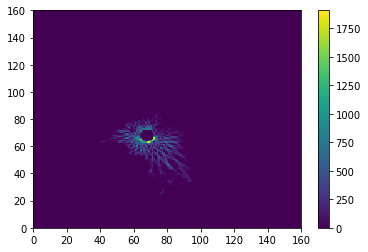

In [36]:
plt.pcolor(fb_count_array[0])
plt.colorbar()

In [293]:
fb_array.shape

(200, 160, 160)

In [55]:
fb_OI_array[i][]

(160, 160)

/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: Mean of empty slice
/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: Mean of empty slice
/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: Mean of empty slice
/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/ipykernel_launcher.py:41: RuntimeWarning: Mean of empty slice
/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/ipykernel_launcher.py:48: RuntimeWarning: Mean of empty slice
/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/ipykernel_launcher.py:55: RuntimeWarning: Mean of empty slice


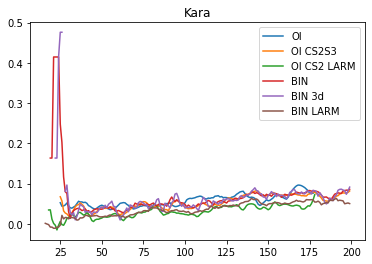

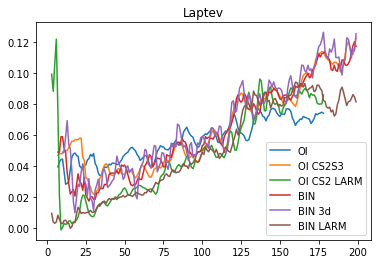

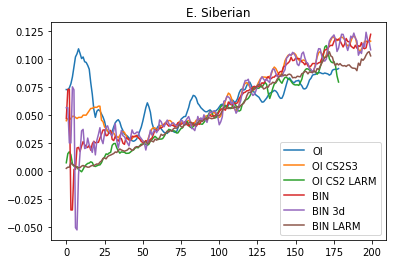

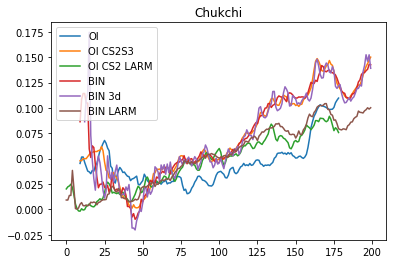

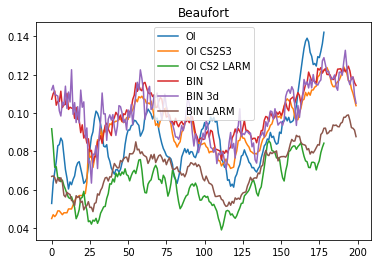

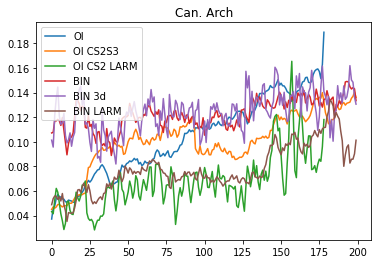

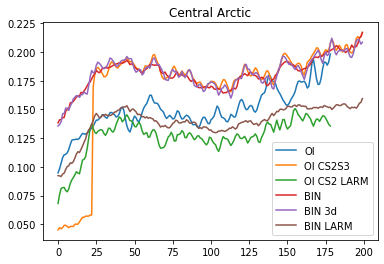

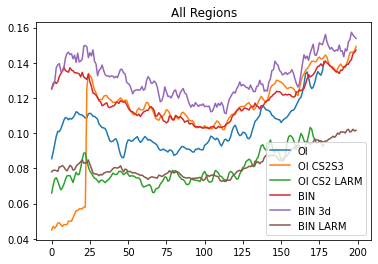

In [94]:
regions = [[9], [10], [11], [12], [13], [14], [15], [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,21]]
reg_name = ['Kara', 'Laptev', 'E. Siberian', 'Chukchi','Beaufort', 'Can. Arch', 'Central Arctic', 'All Regions']


for nr in range(8):

    fb_OI_regions = []
    fb_regions = []
    fb_regions_3d = []    
    fb_Bristol_regions = []
    fb_OI_CS2S3_regions = []
    fb_OI_Bristol_LARM_regions = []


    for i in range(len(fb_OI_list)-1):
        reg = np.isin(mask_values,regions[nr])
        IDs = np.where(np.isnan(fb_array[i].T))
        temp=fb_OI_array[i].copy()
        temp[IDs]=np.nan
        interp_mean = np.nanmean(temp[reg])
        fb_OI_regions.append(interp_mean)

        reg = np.isin(mask_values,regions[nr])
        IDs = np.where(np.isnan(fb_array[i].T))
        temp=fb_OI_CS2S3_array[i].copy()
        temp[IDs]=np.nan
        interp_mean = np.nanmean(temp[reg])        
        fb_OI_CS2S3_regions.append(interp_mean)

        reg = np.isin(mask_values,regions[nr])
        IDs = np.where(np.isnan(fb_Bristol_array[i].T))
        temp=fb_OI_Bristol_LARM_array[i].copy()
        temp[IDs]=np.nan
        interp_mean = np.nanmean(temp[reg])     
        fb_OI_Bristol_LARM_regions.append(interp_mean)
        
        reg = np.isin(mask_values,regions[nr])
        IDs = np.where(np.isnan(fb_array[i]))
        temp=fb_array[i].copy()
        temp[IDs]=np.nan
        interp_mean = np.nanmean(temp.T[reg])   
        fb_regions.append(interp_mean)

        reg = np.isin(mask_values,regions[nr])
        IDs = np.where(np.isnan(fb_array_3d[i]))
        temp=fb_array_3d[i].copy()
        temp[IDs]=np.nan
        interp_mean = np.nanmean(temp.T[reg])   
        fb_regions_3d.append(interp_mean)        
        
        reg = np.isin(mask_values,regions[nr])
        IDs = np.where(np.isnan(fb_Bristol_array[i]))
        temp=fb_Bristol_array[i].copy()
        temp[IDs]=np.nan
        interp_mean = np.nanmean(temp.T[reg])           
        fb_Bristol_regions.append(interp_mean)        
        

    plt.plot(fb_OI_regions,label='OI')
    plt.plot(fb_OI_CS2S3_regions,label='OI CS2S3')
    plt.plot(fb_OI_Bristol_LARM_regions,label='OI CS2 LARM')

    plt.plot(fb_regions,label='BIN')
    plt.plot(fb_regions_3d,label='BIN 3d')
    plt.plot(fb_Bristol_regions,label='BIN LARM')

    plt.title(reg_name[nr])
    plt.legend()
    plt.savefig('OI_vs_BIN_'+reg_name[nr]+'_masked.png')
    plt.show()

In [90]:
fb_OI_array[i].shape

(160, 160)

In [92]:
fb_array[i].T.shape

(160, 160)

In [ ]:
#mask where binned data only
regions = [[9], [10], [11], [12], [13], [14], [15], [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,21]]
reg_name = ['Kara', 'Laptev', 'E. Siberian', 'Chukchi','Beaufort', 'Can. Arch', 'Central Arctic', 'All Regions']


for nr in range(8):

    fb_OI_regions = []
    fb_regions = []
    fb_regions_3d = []    
    fb_Bristol_regions = []
    fb_OI_CS2S3_regions = []
    fb_OI_Bristol_LARM_regions = []


    for i in range(len(fb_OI_list)-1):
        reg = np.isin(mask_values,regions[nr])
        interp_mean = np.nanmean(fb_OI_array[i][reg])
        fb_OI_regions.append(interp_mean)

        reg = np.isin(mask_values,regions[nr])
        interp_mean = np.nanmean(fb_OI_CS2S3_array[i][reg])
        fb_OI_CS2S3_regions.append(interp_mean)

        reg = np.isin(mask_values,regions[nr])
        interp_mean = np.nanmean(fb_OI_Bristol_LARM_array[i][reg])
        fb_OI_Bristol_LARM_regions.append(interp_mean)
        
        reg = np.isin(mask_values,regions[nr])
        interp_mean = np.nanmean(fb_array[i].T[reg])
        fb_regions.append(interp_mean)

        reg = np.isin(mask_values,regions[nr])
        interp_mean = np.nanmean(fb_array_3d[i].T[reg])
        fb_regions_3d.append(interp_mean)        
        
        reg = np.isin(mask_values,regions[nr])
        interp_mean = np.nanmean(fb_Bristol_array[i].T[reg])
        fb_Bristol_regions.append(interp_mean)        
        

#     plt.plot(fb_OI_regions,label='OI')
    plt.plot(fb_OI_CS2S3_regions,label='OI CS2S3')
#     plt.plot(fb_OI_Bristol_LARM_regions,label='OI CS2 LARM')

    plt.plot(fb_regions,label='BIN')
    plt.plot(fb_regions_3d,label='BIN 3d')
#     plt.plot(fb_Bristol_regions,label='BIN LARM')

    plt.title(reg_name[nr])
    plt.legend()
    plt.savefig('OI_vs_BIN_'+reg_name[nr]+'.png')
    plt.show()

/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: Mean of empty slice
/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: Mean of empty slice
/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: Mean of empty slice
/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: Mean of empty slice
/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice


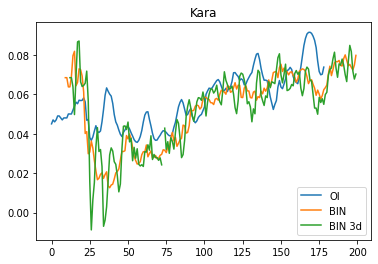

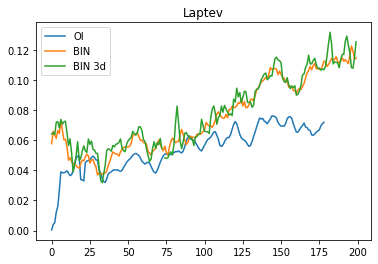

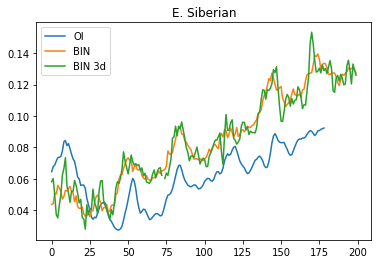

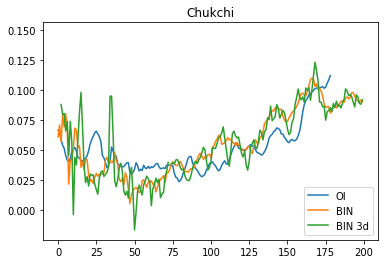

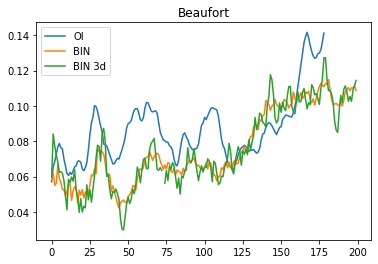

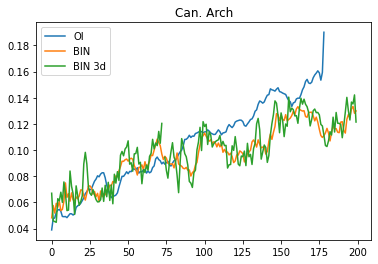

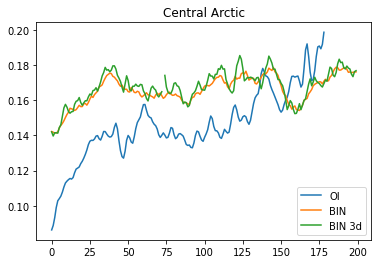

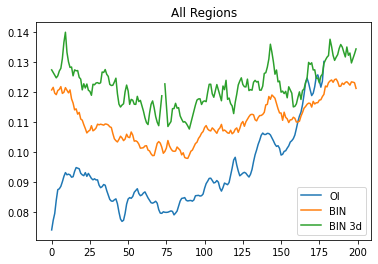

In [305]:
regions = [[9], [10], [11], [12], [13], [14], [15], [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,21]]
reg_name = ['Kara', 'Laptev', 'E. Siberian', 'Chukchi','Beaufort', 'Can. Arch', 'Central Arctic', 'All Regions']


for nr in range(8):

    fb_OI_regions = []
    fb_regions = []
    fb_regions_3d = []    
    fb_Bristol_regions = []
    fb_OI_CS2S3_regions = []
    fb_OI_Bristol_LARM_regions = []


    for i in range(len(fb_OI_list)-1):
        reg = np.isin(mask_values,regions[nr])
        interp_mean = np.nanmean(fb_OI_array[i][reg])
        fb_OI_regions.append(interp_mean)

        reg = np.isin(mask_values,regions[nr])
        interp_mean = np.nanmean(fb_OI_CS2S3_array[i][reg])
        fb_OI_CS2S3_regions.append(interp_mean)

        reg = np.isin(mask_values,regions[nr])
        interp_mean = np.nanmean(fb_OI_Bristol_LARM_array[i][reg])
        fb_OI_Bristol_LARM_regions.append(interp_mean)
        
        reg = np.isin(mask_values,regions[nr])
        interp_mean = np.nanmean(fb_array[i].T[reg])
        fb_regions.append(interp_mean)

        reg = np.isin(mask_values,regions[nr])
        interp_mean = np.nanmean(fb_array_3d[i].T[reg])
        fb_regions_3d.append(interp_mean)        
        
        reg = np.isin(mask_values,regions[nr])
        interp_mean = np.nanmean(fb_Bristol_array[i].T[reg])
        fb_Bristol_regions.append(interp_mean)        
        

    plt.plot(fb_OI_regions,label='OI')
# #     plt.plot(fb_OI_CS2S3_regions,label='OI CS2S3')
#     plt.plot(fb_OI_Bristol_LARM_regions,label='OI CS2 LARM')

    plt.plot(fb_regions,label='BIN')
    plt.plot(fb_regions_3d,label='BIN 3d')
#     plt.plot(fb_Bristol_regions,label='BIN LARM')

    plt.title(reg_name[nr])
    plt.legend()
    plt.savefig('OI_vs_BIN_'+reg_name[nr]+'.png')
    plt.show()

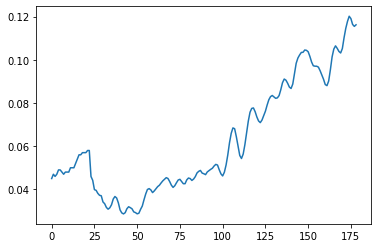

In [220]:
plt.plot(fb_OI_regions)

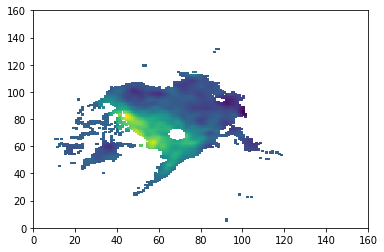

In [201]:
plt.pcolor(fb_OI_array[30])

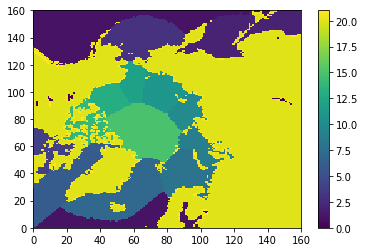

In [212]:
plt.pcolor(mask_values)
plt.colorbar()

In [180]:
x_WG.shape

(161, 161)

In [157]:
! ls 

Binning_Freeboard_RunningMean.ipynb
Binning_Freeboard_RunningMean_Basemap.ipynb
Binning_Freeboard_RunningMean_Basemap_CS2_Bristol_fb.ipynb
Binning_elevation_RunningMean_Basemap.ipynb
Binning_elevation_SH_RunningMean_Basemap.ipynb
Compare_OI_vs_bin.ipynb
Data_all_15days
Data_all_31days
Data_all_9days
Figs_all_15days
Figs_all_31days
Figs_all_9days
NSIDC_Regions_Masks-2.nc


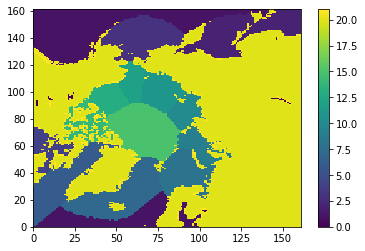

In [183]:
plt.pcolor(mask_values)
plt.colorbar()

In [184]:
mask_values.shape

(161, 161)

In [ ]:
# period=9
# periodtext ='%01d' %(period)
# start_date = date(2018, 10, 1)
# end_date = date(2019, 6, 2)
# fb_bristol_list={}
# for single_date in daterange(start_date, end_date):
#     yearstr0  ='%02d' %(single_date.year)
#     monthstr0 ='%02d' %(single_date.month)
#     daystr0 ='%02d' %(single_date.day)
#     print(single_date.strftime("%Y-%m-%d"),single_date.year,single_date.month,single_date.day)
#     fb_bristol_list[single_date.strftime("%Y-%m-%d")]=np.load('Data_all_'+periodtext+'days/FB_Bristol/hist2D_freeboard_map_calc_day_'+yearstr0+monthstr0+daystr0+'.npy')




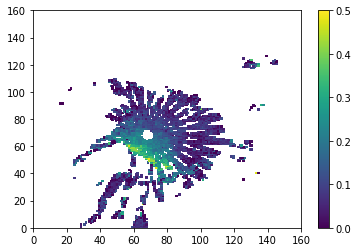

In [45]:
plt.pcolor(fb_list['2019-01-20'],vmin=0,vmax=0.5)
plt.colorbar()

In [23]:
period=9
periodtext ='%01d' %(period)
test=np.load('Data_all_'+periodtext+'days/FB/hist2D_freeboard_map_calc_day_'+yearstr0+monthstr0+daystr0+'.npy')



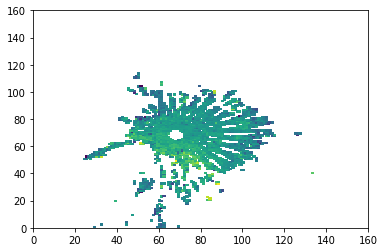

In [25]:
plt.pcolor(test)

In [151]:
! ls Data_all_31days/

SLA


In [10]:
single_date.month

6

In [6]:
for single_date in daterange(start_date, end_date):
        print(single_date.strftime("%Y-%m-%d"),single_date.year,single_date.month,single_date.day)    
        np.load('Data_all_'+periodtext+'days/FB/hist2D_freeboard_map_calc_count_day_'+str(yearstr0+monthstr0+daystr0+'.npy',H2D[0])



2018-10-01 2018 10 1
2018-10-02 2018 10 2
2018-10-03 2018 10 3
2018-10-04 2018 10 4
2018-10-05 2018 10 5
2018-10-06 2018 10 6
2018-10-07 2018 10 7
2018-10-08 2018 10 8
2018-10-09 2018 10 9
2018-10-10 2018 10 10
2018-10-11 2018 10 11
2018-10-12 2018 10 12
2018-10-13 2018 10 13
2018-10-14 2018 10 14
2018-10-15 2018 10 15
2018-10-16 2018 10 16
2018-10-17 2018 10 17
2018-10-18 2018 10 18
2018-10-19 2018 10 19
2018-10-20 2018 10 20
2018-10-21 2018 10 21
2018-10-22 2018 10 22
2018-10-23 2018 10 23
2018-10-24 2018 10 24
2018-10-25 2018 10 25
2018-10-26 2018 10 26
2018-10-27 2018 10 27
2018-10-28 2018 10 28
2018-10-29 2018 10 29
2018-10-30 2018 10 30
2018-10-31 2018 10 31
2018-11-01 2018 11 1
2018-11-02 2018 11 2
2018-11-03 2018 11 3
2018-11-04 2018 11 4
2018-11-05 2018 11 5
2018-11-06 2018 11 6
2018-11-07 2018 11 7
2018-11-08 2018 11 8
2018-11-09 2018 11 9
2018-11-10 2018 11 10
2018-11-11 2018 11 11
2018-11-12 2018 11 12
2018-11-13 2018 11 13
2018-11-14 2018 11 14
2018-11-15 2018 11 15
2018-1

In [ ]:
# np.save('Data_all_'+periodtext+'days/FB/hist2D_freeboard_map_calc_count_day_'+yearstr0+monthstr0+daystr0+'.npy',H2D[0])
np.load('Data_all_'+periodtext+'days/FB/hist2D_freeboard_map_calc_count_day_'+yearstr0+monthstr0+daystr0+'.npy',H2D[0])


